# Testing a Perceptual Phenomenon:  The Stroop Effect

For this project, we will be analyzing the results of an experiment called "The Stroop Effect". 

What is this experiment? Coming directly from the project instructions, it states that participants are presented with a list of words that are displayed in different colors.  They are instructed to say the color of the word out loud.  The conditions of this project are that one set of words match the color in which they are printed and other words are a different color than the color it spells.  A little confusing, isn't it? 

These conditions are labeled as congruent and incongruent.

**Congruent**:  Words match the color that is printed.    

> **EXAMPLE 1:** <font color='green'>GREEN</font>

> **EXAMPLE 2:** <font color='red'>RED</font>

**Incongruent**:  Words do **NOT** match the color that is printed.    

> **EXAMPLE 1:** <font color='green'>BLUE</font>

> **EXAMPLE 2:** <font color='red'>BROWN</font>

We want to do some investigating and analyzation of this experiment. First, there are a few questions we want to answer.

## Question 1:   Identify Variables in the Experiment

Our **Independent Variable** is the variable that doesn't change in the experiment, so it is the **Test the participants took**, which are the **congruent** and **incongruent** tests. 

Our **Dependent Variable**, or variable that **depends on the independent variable** and are the**focus of the study**, so it will be the **recorded time** it took for each participant **to finish** the test.

*These variables are included in a dataset we will be importing shortly.*


## Question 2a:  Establish Hypotheses

**Null Hypothesis**: There will be *no significant difference* in the time it takes to complete the congruent test versus the incongruent test.

**Alternative Hypothesis**: The incongruent test will take longer than the congruent test.

The hypotheses can be displayed by using certain symbols and can be mathematically represented as what I wrote below. 


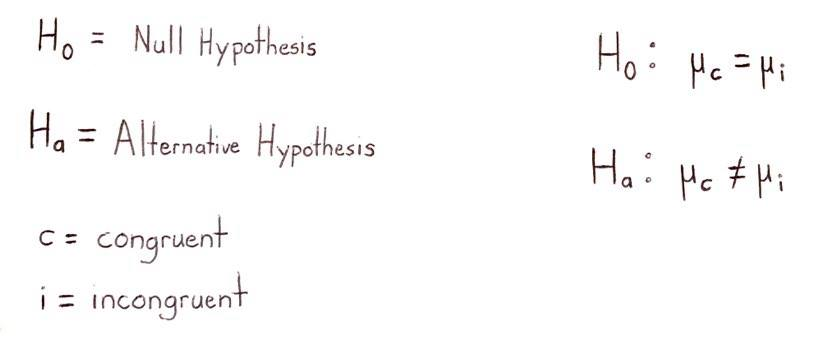


In this image, You can see the letters that represent each hypothesis and that we can use a **c** to represent congruent in our mathematical statement and **i** to represent incongruent.

We can then use the greek symbol(mu) and add a letter beside it to represent our data.  

So if there was no significant difference between our data, the congruent and incongruent data would be the same.  It is the null hypothesis.

If there was some difference in the data, the congruent and incongruent data would **not** be equal.  It is the alternative hypothesis.

## Question 2b:  Establish a Statistical Test

We will be conducting a paired t-test for our statistical analysis. We will compare both test times by finding the average time it took each participant to complete.  

Th paired t-test will be good for our research because our sample size will be the same (24) for both sets of data since they took both tests in the study. 

We don't know any additional parameters of the population other than the same 24 participants took both tests. 




## Question 3: Report Descriptive Statistics

To make things a little more organized, we will go ahead and import libraries that will be useful as we continue.

In [1]:
#importing all packages needed for analyzing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import csv

#'magic word' to help plot data visually
%matplotlib inline

Now we can import the dataset that will be the focus point for our analysis.

In [2]:
#read our csv file and assign a variable 
stroop_data = pd.read_csv('stroopdata.csv')

#Just to make things a little cleaner, we can have our index start at 1
#That way it can better represent the number of participants in the study
stroop_data.index += 1

#prints our dataset
stroop_data

,Congruent,Incongruent
1,12.079,19.278
2,16.791,18.741
3,9.564,21.214
4,8.630,15.687
5,14.669,22.803
6,12.238,20.878
7,14.692,24.572
8,8.987,17.394
9,9.401,20.762
10,14.480,26.282


Let's find the average time it took to complete each test.

In [3]:
#Making a copy of the original dataset to preserve each cell's analysis
stroop_average = stroop_data.copy()

#Finding the average time and rounding it to 3 decimal places
#Keeps data similar to dataset
stroop_average.mean().round(3)

Congruent      14.051
Incongruent    22.016
dtype: float64

The average congruent test time was about 14 seconds while the incongruent test completion took about 22 seconds.

Now let's find the standard deviation.

In [4]:
#Making a copy of the dataset to preserve each cell's analysis
stroop_dev = stroop_average.copy()

#Finding the standard deviation of the average times
#Rounding to 3 decimal places to maintain similar data
stroop_dev.std().round(3)

Congruent      3.559
Incongruent    4.797
dtype: float64

Our congruent deviation was around 3.5 while the incongruent deviation was closer to 4.8.

## Question 4:  Plot the Data

For visualization, we will use a simple box plot to show how the differences between the test times.

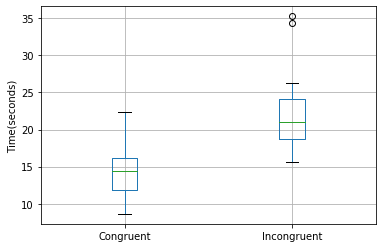

In [5]:
#Making a copy of the dataset to preserve each cell's analysis
bxplot = stroop_data.copy()

#Labeling y axis
plt.ylabel('Time(seconds)')

#Simple box plot graph
bxplot.boxplot()
plt.show()


The box plot visual is very basic but the simplicity of it illustrates that the datasets do not share the same data.  We can even notice that the Incongruent data has two outliers a good distance from the closest outer fence.  Those participants seem to have taken much longer to complete their Incongruent test.

## Question 5:  Perform the statistical test and interpret your results

There are a few questions we need to answer to get a full understanding of our dataset.

### What is your confidence level and your critical statistic value?

We will be using a confidence level of 95% because although our sample size is only 24 participants, they both did the same tests and all had the same trend of one test taking longer than the other. 

First  lets find the p estimate of the data. This will be the difference between the means of Incongruent and Congruent.  We can use our previous data from above.

In [6]:
#Grabbing the separated mean values for both tests
c_mean = stroop_average['Congruent'].mean()
ic_mean = stroop_average['Incongruent'].mean()

#Finding p estimate

p_estimate = ic_mean - c_mean

p_estimate

7.964791666666665

Now we want to find the standard deviation.  For this, we are going to find the difference of the congruent and incongruent test times for each participant. 

In [7]:
#Using our dataframe from a previous column
cg_data = stroop_data['Congruent']
incg_data = stroop_data['Incongruent']

#Finding the difference then calculating standard deviation
test_diff = (cg_data - incg_data).std()

#Returning result
test_diff



4.864826910359056

And now we need to find our t critical value.  We first need to have our **degrees of freedom**, which will be our sample size(24) minus 1.  Since this is very simple math, we can just calculate that our number is 23.

We will be a chart provided by San Jose State University to help us quickly find our critical value. Since we are conducting a two tailed t test, we will be using the *two tails* row of values.

1. First, we need to find our **alpha level**, or our remaining percentage of the confidence level, so 5%. We draw a box down.
2. Next, find our **degrees of freedom** on the left hand side of the chart.  We draw a box across the row.
3. Finally, we find our t critical by finding the value where the two boxes intersect.

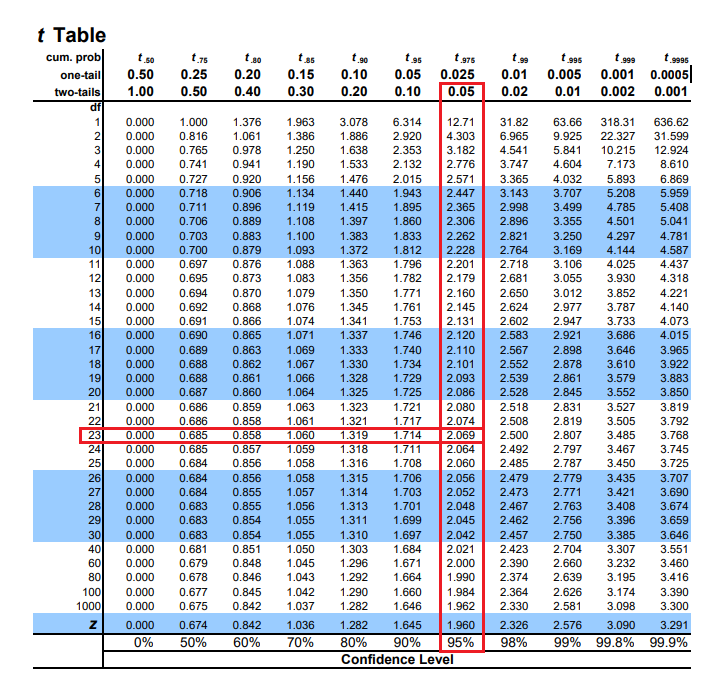



<font size = 1> *graph downloaded from https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf* </font>

Before we continue, let's review what we know so far.

**Confidence Level**:  **95%**

**Degrees of Freedom**:  **23**

**p Estimate** (rounded to three decimal places):  **7.964**

**Standard Deviation** (rounded to three decimal places):  **4.864**

**t Critical Value**:  **2.069**

Finally, let's find the **t statistic** and review our results.

In [8]:
#Geting our values for the formula
p_est = 7.964
std_dev = 4.864
s_size = 24

#Plugging in values and returning our t statistic
t_stat = p_est/(std_dev/m.sqrt(s_size))
t_stat

8.021273154410046

### Conclusion:

Based on all of our analasyis and research,  we have no choice but to reject the null hypothesis.  Early in the analysis, we  could already see that the test times having no significant difference was simply not true.  We have to back up our conclusion with our findings and have successfully confirmed the outcome I believed would happen.